# Flux Qubit

The flux qubit complements the previous circuits, which have been discussed in this documentation, as another important example since it represents a 3-node circuit. One of the nodes will be declared as a ground node which leads effectively to a 2-dimensional problem that will be discussed here.

In [1]:
import circuitq as cq
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#### Circuit Graph

<img src="circuit_figures/fluxqubit_circuit.png" alt="Fluxqubit Circuit" width="250"/>


In [2]:
graph = nx.MultiGraph()
graph.add_edge(0,1, element = 'C')
graph.add_edge(0,1, element = 'J')
graph.add_edge(1,2, element = 'C')
graph.add_edge(1,2, element = 'J')
graph.add_edge(0,2, element = 'C')
graph.add_edge(0,2, element = 'J');

#### Symbolic Hamiltonian

In [3]:
circuit = cq.CircuitQ(graph)
circuit.h_parameters

[C_{01}, C_{02}, C_{12}, E_{J010}, E_{J020}, E_{J120}, \tilde{\Phi}_{120}]

In [4]:
circuit.h

-E_{J010}*cos(3.03853489761902e+15*\Phi_{1}) - E_{J020}*cos(3.03853489761902e+15*\Phi_{2}) - E_{J120}*cos(-3.03853489761902e+15*\Phi_{1} + 3.03853489761902e+15*\Phi_{2} + 3.03853489761902e+15*\tilde{\Phi}_{120}) + 0.5*q_{1}*(C_{12}*q_{2}/(C_{01}*C_{02} + C_{01}*C_{12} + C_{02}*C_{12}) + q_{1}*(C_{02} + C_{12})/(C_{01}*C_{02} + C_{01}*C_{12} + C_{02}*C_{12})) + 0.5*q_{2}*(C_{12}*q_{1}/(C_{01}*C_{02} + C_{01}*C_{12} + C_{02}*C_{12}) + q_{2}*(C_{01} + C_{12})/(C_{01}*C_{02} + C_{01}*C_{12} + C_{02}*C_{12}))

#### Diagonalization

Here, we will choose two junctions to have the same Josephson energy and the same shunted capacity. The third junction is scaled by `alpha`, which we choose to be $0.7$. The parameter `dim` refers to the dimension for one node which leads to a total matrix dimension of `dim`$ ^2$.

In [5]:
dim = 50
EJ = 1*circuit.c_v["E"]
alpha = 0.7
C = circuit.c_v["C"]
phi_ext = np.pi*circuit.phi_0 
h_num = circuit.get_numerical_hamiltonian(dim, parameter_values=[C,C,alpha*C,EJ,EJ,alpha*EJ,phi_ext])
eigv, eigs = circuit.get_eigensystem(100)

Let's plot the lowest eigenenergies.

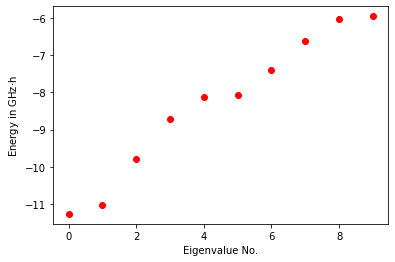

In [6]:
h = 6.62607015e-34 
y_scaling = 1/(h *1e9)
plt.plot(np.arange(10), eigv[:10]*y_scaling, 'ro')
plt.xlabel("Eigenvalue No.")
plt.ylabel(r"Energy in GHz$\cdot$h")
plt.show() 

The potential of the flux qubit is made up of three cosine terms. This leads to a egg carton shaped potential. As we didn't specify the grid length above, the flux coordinate grid is set to the default interval $[-4\pi\Phi_0,4\pi\Phi_0 ]$. This will repeat the maximum 4 by 4 times. Let's plot the potential.

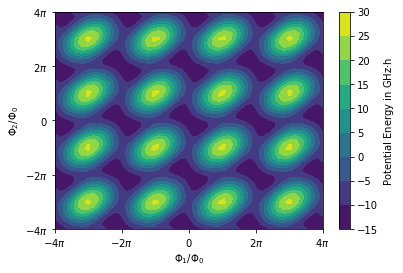

In [7]:
def potential(phi_1, phi_2, phi_ex):
    return (-EJ*np.cos(phi_1/circuit.phi_0) - EJ*np.cos(phi_2/circuit.phi_0) -
             alpha*EJ*np.cos((phi_2-phi_1+phi_ex)/circuit.phi_0) )
phis = np.linspace(-4*np.pi*circuit.phi_0, 4*np.pi*circuit.phi_0, dim)
potential_list = [potential(phi_1,phi_2,phi_ext)*y_scaling for phi_2 in phis for phi_1 in phis]
plt.contourf(phis, phis, np.array(potential_list).reshape(dim,dim))
plt.xticks(np.linspace(-4*np.pi, 4*np.pi, 5)*circuit.phi_0 ,
           [r'$-4\pi$',r'$-2\pi$',r'$0$',r'$2\pi$',r'$4\pi$'])
plt.yticks(np.linspace(-4*np.pi, 4*np.pi, 5)*circuit.phi_0 ,
           [r'$-4\pi$',r'$-2\pi$',r'$0$',r'$2\pi$',r'$4\pi$'])
plt.xlabel(r"$\Phi_1 / \Phi_0$")
plt.ylabel(r"$\Phi_2 / \Phi_0$")
plt.colorbar(label="Potential Energy in GHz$\cdot$h")
plt.show()

Due to the periodicity of the potential, CircuitQ implements the Hamiltonian in the charge basis. To be able to plot the eigenstates as a function of flux, we use the transformation method `transform_charge_to_flux()`.

In [8]:
circuit.transform_charge_to_flux()
eigs = circuit.estates_in_phi_basis

Now, we are able to plot the square of the absolute value of the lowest eigenstates as a function of flux.

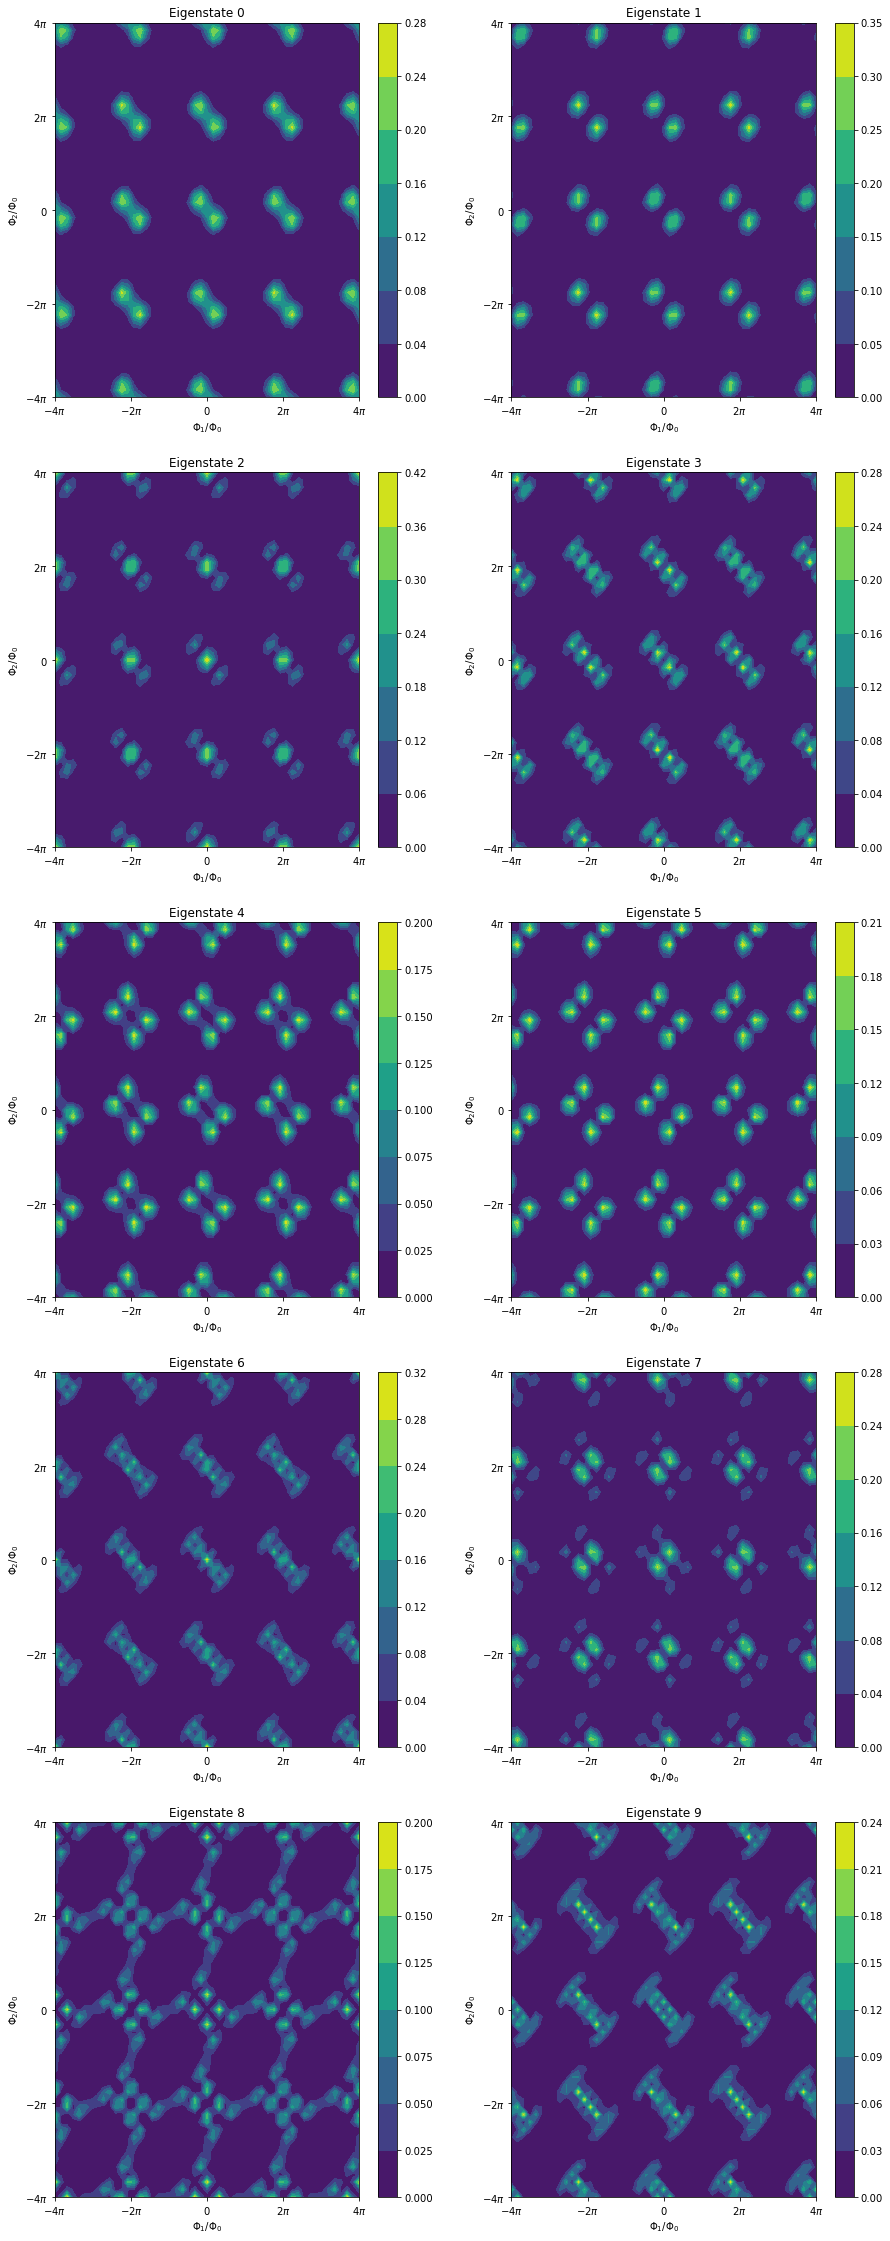

In [9]:
plt.figure(figsize=(15,40))
for n in range(10):
    plt.subplot(5,2, n+1)
    plt.contourf(circuit.flux_list, circuit.flux_list, 
                 abs(np.array(eigs[n].reshape(circuit.n_dim,circuit.n_dim)))**2)
    plt.colorbar()
    plt.title("Eigenstate " + str(n) )
    plt.xticks(np.linspace(-4*np.pi, 4*np.pi, 5)*circuit.phi_0 ,
               [r'$-4\pi$',r'$-2\pi$',r'$0$',r'$2\pi$',r'$4\pi$'])
    plt.yticks(np.linspace(-4*np.pi, 4*np.pi, 5)*circuit.phi_0 ,
               [r'$-4\pi$',r'$-2\pi$',r'$0$',r'$2\pi$',r'$4\pi$'])
    plt.xlabel(r"$\Phi_1 / \Phi_0$")
    plt.ylabel(r"$\Phi_2 / \Phi_0$")
plt.show()

We find that the lowest two eigenstates are located at the double well between the maxima of the potential.